In [1]:
import pandas as pd
import pyarrow
import os

# Configurable arguments
ROOT_DIR = "../data/ehan31/hannum/raw"  # Root directory for all data

# Define data reading function
def read_arrow_data(file, path=ROOT_DIR+"/"):
    filepath = path + file
    data_df = pd.read_feather(filepath)
    return data_df


# Read in data
os.makedirs(ROOT_DIR, exist_ok=True)

age_df = read_arrow_data(file="metadata/metadata.arrow")
#age_df.head()
print(age_df.columns)

beta_df = read_arrow_data(file="betas/gse_betas.arrow") #NOTE: This requires 70+ GB Ram
beta_df.head()

Index(['title', 'geo_accession', 'status', 'submission_date',
       'last_update_date', 'type', 'channel_count', 'source_name_ch1',
       'organism_ch1', 'taxid_ch1', 'molecule_ch1', 'extract_protocol_ch1',
       'label_ch1', 'label_protocol_ch1', 'hyb_protocol', 'scan_protocol',
       'description', 'data_processing', 'platform_id', 'contact_name',
       'contact_email', 'contact_institute', 'contact_address', 'contact_city',
       'contact_state', 'contact_zip/postal_code', 'contact_country',
       'supplementary_file', 'series_id', 'data_row_count', 'age (y)',
       'source', 'plate', 'gender', 'ethnicity', 'tissue'],
      dtype='object')


,cg13869341,cg14008030,cg12045430,cg20826792,cg00381604,cg20253340,cg21870274,cg03130891,cg24335620,cg16162899,...,cg27124406,cg19565306,cg22012975,cg10353737,cg22531257,cg22662321,cg06996138,cg16817496,cg07660283,cg09226288
GSM989827,0.849261,0.505916,0.072590,0.186961,0.036803,0.661391,0.777891,0.119538,0.782193,0.905126,...,0.079514,0.003605,0.016267,0.058144,0.016545,0.044135,0.021236,0.291702,0.727581,0.705499
GSM989828,0.897434,0.476842,0.079020,0.228201,0.053161,0.545065,0.776407,0.063938,0.787890,0.913628,...,0.080328,0.004043,0.008628,0.044876,0.014927,0.058587,0.019314,0.232008,0.693993,0.716328
GSM989829,0.751596,0.487245,0.089230,0.237660,0.045588,0.560305,0.774234,0.113279,0.788896,0.914348,...,0.079417,0.003508,0.004635,0.041357,0.024015,0.058990,0.016854,0.296456,0.703291,0.703523
GSM989830,0.871313,0.466692,0.076666,0.253624,0.032824,0.509904,0.772503,0.067163,0.800081,0.882308,...,0.080837,0.005296,0.006407,0.041691,0.030413,0.064237,0.019278,0.270818,0.751772,0.696888
GSM989831,0.775703,0.490255,0.079986,0.220404,0.035804,0.549847,0.730345,0.131637,0.759171,0.902783,...,0.084922,0.016451,0.007065,0.060183,0.015760,0.064953,0.016097,0.236963,0.746697,0.693056


In [ ]:
# #Grab a few columns from beta df for testing (rows from both dfs are sorted by index so can convert directly to numpy)
# # Use the 353 methylation sites from the Horvath Clock
# df_methylation_sites = pd.read_csv("./coefficients.csv")['CpGmarker'][1:]
# list_of_methylation_sites = list(df_methylation_sites)[1:]

## Create graphs of all methylation sites
list_of_methylation_sites = list(beta_df.columns)
print(len(list_of_methylation_sites))

age_v = age_df['age (y)'].to_numpy(dtype=int)
beta_v = beta_df[list_of_methylation_sites].to_numpy()

## Plot and save images
from GenSmoothScatter import smooth_scatter

# Create and save images for each methylation site
filepath = "../data/ehan31/hannum/processed/images/"  
fname = filepath+list_of_methylation_sites[0]

print("Seeing if sites are already processed...")
start = 0
i = 0
while os.path.isfile(fname + ".pkl"):
    i += 1
    start = i
    fname = filepath+list_of_methylation_sites[i]
    
    if i % 1000 == 0:
        print(f"Done with {i} sites")
        
if i == 0:
    print("No sites found, starting from the beginning!")
else:
    print(f"Starting from site {start}!")    

# Begin to create new images
for i in range(start, len(list_of_methylation_sites)):
    if i % 500 == 0:
        print(f"Processed {i} sites!")
    fname = filepath+list_of_methylation_sites[i]
    if not os.path.isfile(fname+ ".pkl"):
        # Generated images are 400 x 300
        smooth_scatter(age_v, beta_v[:, i], filename=fname, marker_size=1) # This takes forever :(
    else:
        print(f"{fname} already exists!")

print("Done with creating plots!")

473034
Seeing if sites are already processed...
Done with 1000 sites
Done with 2000 sites
Done with 3000 sites
Done with 4000 sites
Done with 5000 sites
Done with 6000 sites
Done with 7000 sites
Done with 8000 sites
Done with 9000 sites
Done with 10000 sites
Done with 11000 sites
Done with 12000 sites
Done with 13000 sites
Done with 14000 sites
Done with 15000 sites
Done with 16000 sites
Done with 17000 sites
Done with 18000 sites
Starting from site 18250!
Processed 18500 sites!
Processed 19000 sites!
Processed 19500 sites!
Processed 20000 sites!
Processed 20500 sites!
Processed 21000 sites!
Processed 21500 sites!
Processed 22000 sites!
Processed 22500 sites!
Processed 23000 sites!
Processed 23500 sites!
Processed 24000 sites!
Processed 24500 sites!
Processed 25000 sites!
Processed 25500 sites!
Processed 26000 sites!
Processed 26500 sites!
Processed 27000 sites!


In [2]:
# Create a custom dataset
from torch.utils.data import Dataset
import torch
import pandas as pd
import numpy as np
from PIL import Image
from moviepy.video.io.bindings import mplfig_to_npimage # This package is the fastest way I've found to turn figs to np arrays
from torchvision import transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import pickle

# Code for turning np rgb arrays to grayscale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)

## Code from OvO Attention!
class MethylationAgeDataset(Dataset):
    def __init__(self, dataframe, root_dir, transform=None, filetype="jpg"):
        self.dataframe = dataframe
        self.transform = transform
        self.root_dir = root_dir

        if filetype != "jpg" and filetype != "pkl":
            raise TypeError("Unrecognized filetype!") 
        else:
            self.filetype = filetype
    
    def __len__(self):
        # Return the length of the dataset
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        # Return the observation based on an index
        if torch.is_tensor(idx):
            idx = idx.tolist()
        img_name = self.dataframe.iloc[idx][0]

        image = None
        if self.filetype == "jpg":
            image = Image.open(os.path.join(self.root_dir + img_name + ".jpg"))
            image = image.convert('L')
            image = np.asarray(image, dtype=np.uint8)
        elif self.filetype == "pkl":
            pkl_file = open(self.root_dir + f"{img_name}.pkl", 'rb')
            fig = pickle.load(pkl_file)
            image = rgb2gray(mplfig_to_npimage(fig))
            plt.close(fig)

        if self.transform:
            image = self.transform(image)
    
        return image
    

# Enter into the dataset the df of ids for the images as well as the transformations we will perform
dataset = MethylationAgeDataset(
    dataframe=pd.DataFrame(list_of_methylation_sites[:2000]),
    root_dir=filepath,
    transform=transforms.ToTensor(),
    filetype="pkl"
)

# Define dataloader
BATCH_SIZE = 128
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=False)

# Code to save data
TENSOR_PATH = "../data/ehan31/hannum/processed/tensors/"
path = TENSOR_PATH + "2k_inputs.pt"
#torch.save(dataloader, path)

In [3]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

# Define Basic Autoencoder model
class Autoencoder(nn.Module):

    def __init__(self):
        super(Autoencoder, self).__init__()
        # NOTE: Input image size is 400 x 300
        self.activation = nn.LeakyReLU()
        self.output_activation = nn.Sigmoid()
        
        # Encoder
        # TODO: Parameter tuning
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 4, 4, stride=3),
            self.activation,
            nn.Conv2d(4, 8, 4, stride=3),
            self.activation,
            nn.Conv2d(8, 16, 4, stride=3),
            self.activation,
        )

        # Decoder
        # TODO: Considering just making the graph a square, the output padding is messing with model
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 8, 4, stride=3, output_padding=[1,1]),
            self.activation,
            nn.ConvTranspose2d(8, 4, 4, stride=3, output_padding=[2,0]),
            self.activation,
            nn.ConvTranspose2d(4, 1, 4, stride=3, output_padding=[2,0]),
            self.output_activation
        )


    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = Autoencoder()
print(model)

# Define losses and optimizer
# TODO: Explore different loss functions
mse_loss_fn = nn.MSELoss()
bce_loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Autoencoder(
  (activation): LeakyReLU(negative_slope=0.01)
  (output_activation): Sigmoid()
  (encoder): Sequential(
    (0): Conv2d(1, 4, kernel_size=(4, 4), stride=(3, 3))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv2d(4, 8, kernel_size=(4, 4), stride=(3, 3))
    (3): LeakyReLU(negative_slope=0.01)
    (4): Conv2d(8, 16, kernel_size=(4, 4), stride=(3, 3))
    (5): LeakyReLU(negative_slope=0.01)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(16, 8, kernel_size=(4, 4), stride=(3, 3), output_padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): ConvTranspose2d(8, 4, kernel_size=(4, 4), stride=(3, 3), output_padding=(2, 0))
    (3): LeakyReLU(negative_slope=0.01)
    (4): ConvTranspose2d(4, 1, kernel_size=(4, 4), stride=(3, 3), output_padding=(2, 0))
    (5): Sigmoid()
  )
)


In [ ]:
def train_loop(dataloader, model, optimizer, device, loss_fns=None):
    size = len(dataloader.dataset)
    model = model.to(device)
    model.train()
    for batch, X in enumerate(dataloader):
        X = X.to(device)
        # Compute prediction and loss
        pred = model(X)
        
        # Manually using combination of MSE and CE for reconstruction loss
        mse_loss = mse_loss_fn(pred, X)
        bce_loss = bce_loss_fn(pred, X)
        loss = 10 * mse_loss + bce_loss # TODO: Constant here will be tweaked

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 8 * BATCH_SIZE == 0:
            loss, current = loss.item(), batch * BATCH_SIZE + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

## Perform Training
# Load everything if not loaded yet
TENSOR_PATH = "../data/ehan31/hannum/processed/tensors/"
file = "2k_inputs.pt"
dataloader = torch.load(TENSOR_PATH + file)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
# Do training
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(dataloader, model, optimizer, device)

/tmp/ipykernel_1994738/4285654473.py:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataloader = torch.load(TENSOR_PATH + file)


cuda
Epoch 1
-------------------------------
here


In [1]:
# Examine example images
example_x = next(iter(dataloader))
with torch.no_grad():
    outputs = model(example_x)

# NOTE: These images have been trained on before
for i, image in enumerate(outputs):
    f, axarr = plt.subplots(2,1)
    axarr[0].imshow(image[0],cmap='gray')
    axarr[1].imshow(example_x[i][0],cmap='gray')
    plt.show()
    plt.close()

NameError: name 'dataloader' is not defined

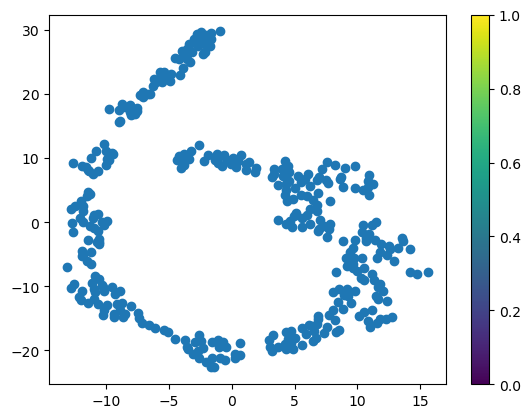

In [58]:
## Rerun model on entire dataset just to get the embeddings
num_samples = len(dataset)
X = torch.stack(list(dataset))
# Get embeddings for num_samples
with torch.no_grad():
    # Run only encoder half
    z = model.encoder(X)

z = np.reshape(z, [num_samples, -1])

/tmp/ipykernel_1889132/221290765.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet', len(clusters))


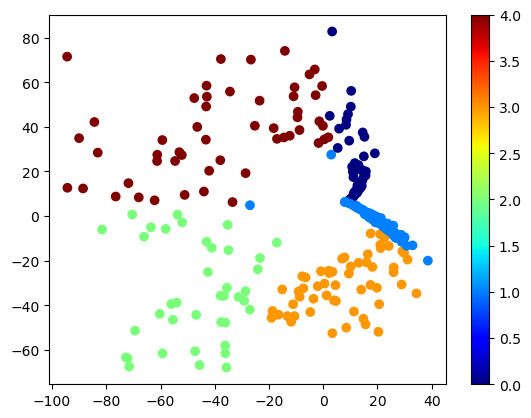

In [91]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Get clusters
kmeans = KMeans(n_clusters=5, random_state=42).fit(z) # number of clusters is arbitrary for now
clusters = kmeans.labels_
cmap = plt.cm.get_cmap('jet', len(clusters))

# Map samples into 2D vector space
tsne = PCA(n_components=2)
transformed = tsne.fit_transform(z)

# # Anotate points
# for i, txt in enumerate(data['cluster'].tolist()):
#     ax.annotate(txt, (x[i],y[i]))

plt.scatter(transformed[:, 0], transformed[:, 1], c=clusters, cmap=cmap)
plt.colorbar()
plt.show()